In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = "wines_SPA.csv"

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [5]:
print(df.head())

          winery           wine  year  rating  num_reviews country  \
0  Teso La Monja          Tinto  2013     4.9           58  Espana   
1         Artadi  Vina El Pison  2018     4.9           31  Espana   
2   Vega Sicilia          Unico  2009     4.8         1793  Espana   
3   Vega Sicilia          Unico  1999     4.8         1705  Espana   
4   Vega Sicilia          Unico  1996     4.8         1309  Espana   

             region   price                  type  body  acidity  
0              Toro  995.00              Toro Red   5.0      3.0  
1    Vino de Espana  313.50           Tempranillo   4.0      2.0  
2  Ribera del Duero  324.95  Ribera Del Duero Red   5.0      3.0  
3  Ribera del Duero  692.96  Ribera Del Duero Red   5.0      3.0  
4  Ribera del Duero  778.06  Ribera Del Duero Red   5.0      3.0  


In [6]:
print(df.dtypes)

winery          object
wine            object
year            object
rating         float64
num_reviews      int64
country         object
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object


In [7]:
Categorical_columns = ['winery', 'wine', 'country', 'region', 'type']
for column in Categorical_columns:
    unique_categories = df[column].nunique()
    print(f"Number of unique categories in {column}: {unique_categories}")

Number of unique categories in winery: 480
Number of unique categories in wine: 847
Number of unique categories in country: 1
Number of unique categories in region: 76
Number of unique categories in type: 21


In [8]:
label_encoder = LabelEncoder()
df['winery'] = label_encoder.fit_transform(df['winery'])
df['wine'] = label_encoder.fit_transform(df['wine'])
df['country'] = label_encoder.fit_transform(df['country'])
df['region'] = label_encoder.fit_transform(df['region'])
df['type'] = label_encoder.fit_transform(df['type'])

In [9]:
df['winery'] = pd.to_numeric(df['winery'], errors='coerce')
df['wine'] = pd.to_numeric(df['wine'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['num_reviews'] = pd.to_numeric(df['num_reviews'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['region'] = pd.to_numeric(df['region'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['type'] = pd.to_numeric(df['type'], errors='coerce')
df['body'] = pd.to_numeric(df['body'], errors='coerce')
df['acidity'] = pd.to_numeric(df['acidity'], errors='coerce')

In [10]:
print(df.dtypes)

winery           int64
wine             int64
year           float64
rating         float64
num_reviews      int64
country          int64
region           int64
price          float64
type             int64
body           float64
acidity        float64
dtype: object


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   int64  
 1   wine         7500 non-null   int64  
 2   year         7210 non-null   float64
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   int64  
 6   region       7500 non-null   int64  
 7   price        7500 non-null   float64
 8   type         7500 non-null   int64  
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 644.7 KB


In [12]:
df.isnull().sum()

winery            0
wine              0
year            290
rating            0
num_reviews       0
country           0
region            0
price             0
type              0
body           1169
acidity        1169
dtype: int64

In [13]:
print(df['year'].mode()[0])
print(df['body'].mode()[0])
print(df['acidity'].mode()[0])

print(df['year'].median())
print(df['body'].median())
print(df['acidity'].median())

2011.0
4.0
3.0
2015.0
4.0
3.0


In [14]:

df['year'].fillna(df['year'].mode()[0], inplace=True)

df['body'].fillna(df['body'].mode()[0], inplace=True)

df['acidity'].fillna(df['acidity'].mode()[0], inplace=True)



df.isnull().sum()


winery         0
wine           0
year           0
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

In [15]:
print(df['country'].unique())

[0]


In [16]:
df = df.drop('country', axis=1)

In [17]:
df.head()

winery  wine    year  rating  num_reviews  region   price  type  body  \
0     422   759  2013.0     4.9           58      69  995.00    19   5.0   
1      33   819  2018.0     4.9           31      74  313.50    18   4.0   
2     447   778  2009.0     4.8         1793      57  324.95    11   5.0   
3     447   778  1999.0     4.8         1705      57  692.96    11   5.0   
4     447   778  1996.0     4.8         1309      57  778.06    11   5.0   

   acidity  
0      3.0  
1      2.0  
2      3.0  
3      3.0  
4      3.0

In [18]:
descriptive_stats = df.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

# Calculate mean, median, and standard deviation for each column
mean_values = df.mean()
median_values = df.median()
std_dev_values = df.std()

print("\nMean Values:")
print(mean_values)

print("\nMedian Values:")
print(median_values)

print("\nStandard Deviation Values:")
print(std_dev_values)

# Calculate interquartile range (IQR) for each column
iqr_values = df.quantile(0.75) - df.quantile(0.25)

print("\nInterquartile Range (IQR) Values:")
print(iqr_values)

Descriptive Statistics:
            winery         wine         year       rating   num_reviews  \
count  7500.000000  7500.000000  7500.000000  7500.000000   7500.000000   
mean    258.368667   467.920267  2013.399333     4.254933    451.109067   
std     128.547692   231.513538     6.821921     0.118029    723.001856   
min       0.000000     0.000000  1910.000000     4.200000     25.000000   
25%     158.000000   260.000000  2011.000000     4.200000    389.000000   
50%     285.000000   496.000000  2015.000000     4.200000    404.000000   
75%     373.000000   666.000000  2017.000000     4.200000    415.000000   
max     479.000000   846.000000  2021.000000     4.900000  32624.000000   

            region        price         type         body      acidity  
count  7500.000000  7500.000000  7500.000000  7500.000000  7500.000000  
mean     50.197733    60.095822    11.859867     4.133733     2.954933  
std      17.308585   150.356676     4.351899     0.539031     0.228858  
min     

/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

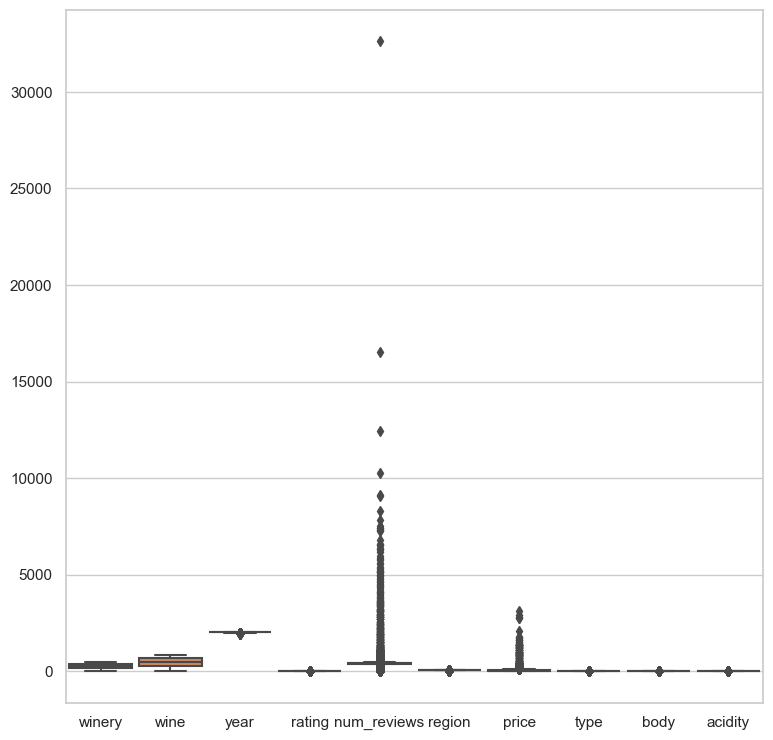

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your dataset
sns.set(style="whitegrid")
plt.figure(figsize=(9, 9))

# Create a box plot for the entire dataset
sns.boxplot(data=df, width=0.9)

# Show the plot
plt.show()


/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

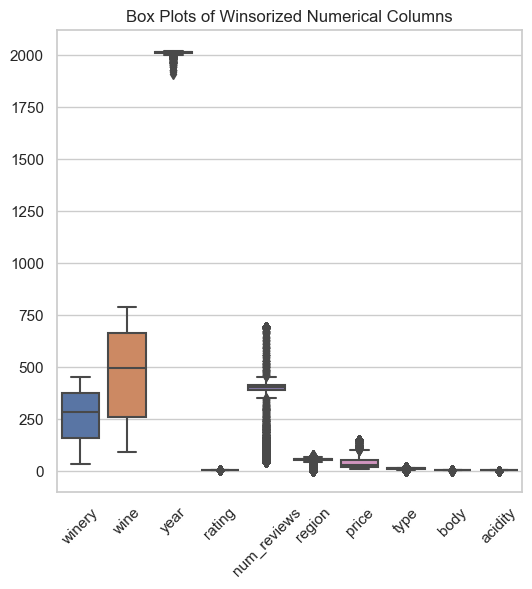

In [20]:
from scipy.stats.mstats import winsorize

limits = [0.05, 0.05]

df['winery'] = winsorize(df['winery'], limits=limits)
df['wine'] = winsorize(df['wine'], limits=limits)
df['num_reviews'] = winsorize(df['num_reviews'], limits=limits)
df['price'] = winsorize(df['price'], limits=limits)
 


plt.figure(figsize=(6, 6))

sns.boxplot(data= df)

plt.title('Box Plots of Winsorized Numerical Columns')

plt.xticks(rotation=45)

plt.show()

In [21]:
descriptive_stats = df.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
            winery         wine         year       rating  num_reviews  \
count  7500.000000  7500.000000  7500.000000  7500.000000  7500.000000   
mean    258.495867   468.796133  2013.399333     4.254933   368.088133   
std     127.247946   226.341232     6.821921     0.118029   144.493514   
min      33.000000    92.000000  1910.000000     4.200000    45.000000   
25%     158.000000   260.000000  2011.000000     4.200000   389.000000   
50%     285.000000   496.000000  2015.000000     4.200000   404.000000   
75%     373.000000   666.000000  2017.000000     4.200000   415.000000   
max     453.000000   790.000000  2021.000000     4.900000   693.000000   

            region        price         type         body      acidity  
count  7500.000000  7500.000000  7500.000000  7500.000000  7500.000000  
mean     50.197733    42.512718    11.859867     4.133733     2.954933  
std      17.308585    34.222967     4.351899     0.539031     0.228858  
min       0.00000

/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/anagharamadas

In [22]:
print(df.columns)

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'region', 'price',
       'type', 'body', 'acidity'],
      dtype='object')


In [23]:
print(df.dtypes)

winery           int64
wine             int64
year           float64
rating         float64
num_reviews      int64
region           int64
price          float64
type             int64
body           float64
acidity        float64
dtype: object


In [24]:
print(df[['price']])

       price
0     150.00
1     150.00
2     150.00
3     150.00
4     150.00
...      ...
7495   19.98
7496   16.76
7497   24.45
7498   64.50
7499   31.63

[7500 rows x 1 columns]


In [25]:
print(df[['rating']])

      rating
0        4.9
1        4.9
2        4.8
3        4.8
4        4.8
...      ...
7495     4.2
7496     4.2
7497     4.2
7498     4.2
7499     4.2

[7500 rows x 1 columns]


In [26]:
rows_with_nulls = df[df.isnull().any(axis=1)]

In [27]:
print(rows_with_nulls)

Empty DataFrame
Columns: [winery, wine, year, rating, num_reviews, region, price, type, body, acidity]
Index: []


Text(0.5, 1.0, 'Histogram of Prices')

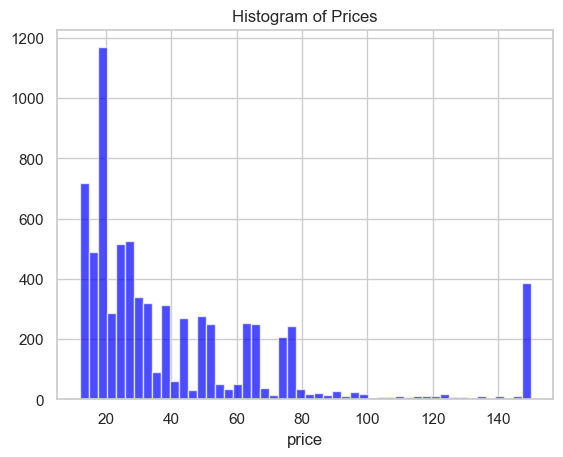

In [28]:
plt.hist(df[['price']], bins=50, color='blue', alpha=0.7)
plt.xlabel('price')
plt.title(f'Histogram of Prices')

Text(0.5, 1.0, 'Histogram of Rating')

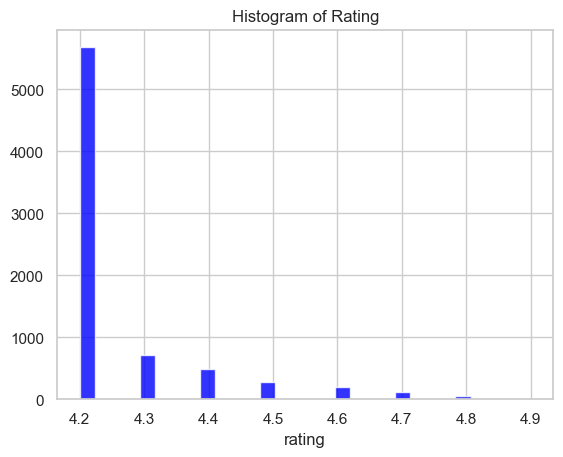

In [29]:
plt.hist(df[['rating']], bins=30, color='blue', alpha=0.8)
plt.xlabel('rating')
plt.title(f'Histogram of Rating')

In [30]:
print(min(df['price']))

11.95


In [31]:
print(max(df['price']))

150.0


In [32]:
print(min(df['rating']))

4.2


In [33]:
print(max(df['rating']))

4.9


0       Expensive
1       Expensive
2       Expensive
3       Expensive
4       Expensive
          ...    
7495        Cheap
7496        Cheap
7497        Cheap
7498       Medium
7499        Cheap
Name: price, Length: 7500, dtype: category
Categories (3, object): ['Cheap' < 'Medium' < 'Expensive']


/var/folders/g9/hbn9851d54v_tl_jf_58lppw0000gn/T/ipykernel_61960/1783271123.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['label'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)


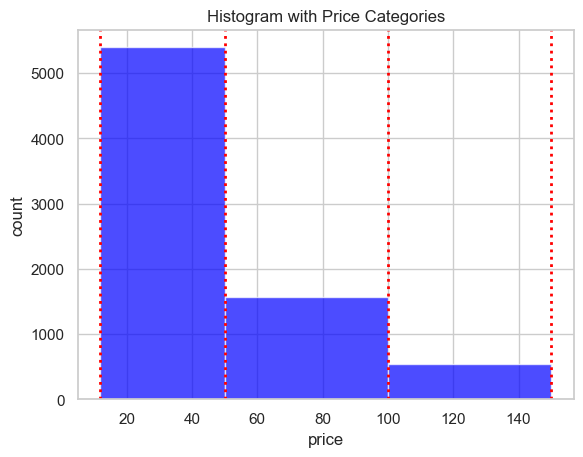

In [34]:
bins = [min(df['price']),50,100,max(df['price'])]
labels = ['Cheap', 'Medium', 'Expensive']

dataset1 = df['price']
# Add a new column with labels based on the bin ranges
dataset1['label'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)
print(dataset1['label'])

# Plot the histogram with labels
plt.hist(df['price'], bins=bins, color='blue', alpha=0.7)
for boundary in bins:
    plt.axvline(boundary, color='red', linestyle='dotted', linewidth=2)
plt.xlabel('price')
plt.ylabel('count')
plt.title('Histogram with Price Categories')
plt.show()

0       Very Good
1       Very Good
2       Very Good
3       Very Good
4       Very Good
          ...    
7495         Poor
7496         Poor
7497         Poor
7498         Poor
7499         Poor
Name: rating, Length: 7500, dtype: category
Categories (3, object): ['Poor' < 'Good' < 'Very Good']


/var/folders/g9/hbn9851d54v_tl_jf_58lppw0000gn/T/ipykernel_61960/3556776832.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['label'] = pd.cut(df['rating'], bins=bins_rating, labels=labels_rating, include_lowest=True)


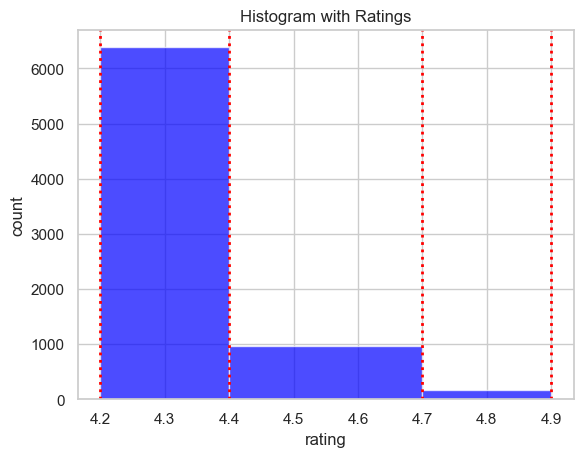

In [35]:
bins_rating = [min(df['rating']),4.4,4.7,max(df['rating'])]
labels_rating = ['Poor','Good','Very Good']

dataset2 = df['rating']
# Add a new column with labels based on the bin ranges
dataset2['label'] = pd.cut(df['rating'], bins=bins_rating, labels=labels_rating, include_lowest=True)
print(dataset2['label'])

# Plot the histogram with labels
plt.hist(df['rating'], bins=bins_rating, color='blue', alpha=0.7)
for boundary in bins_rating:
    plt.axvline(boundary, color='red', linestyle='dotted', linewidth=2)
plt.xlabel('rating')
plt.ylabel('count')
plt.title('Histogram with Ratings')
plt.show()

In [36]:

X = df.drop(["price"], axis=1)

y = df["price"]

print(X)


      winery  wine    year  rating  num_reviews  region  type  body  acidity
0        422   759  2013.0     4.9           58      69    19   5.0      3.0
1         33   790  2018.0     4.9           45      74    18   4.0      2.0
2        447   778  2009.0     4.8          693      57    11   5.0      3.0
3        447   778  1999.0     4.8          693      57    11   5.0      3.0
4        447   778  1996.0     4.8          693      57    11   5.0      3.0
...      ...   ...     ...     ...          ...     ...   ...   ...      ...
7495     159   619  2016.0     4.2          392      59    12   4.0      3.0
7496     158   440  2018.0     4.2          390      53     9   4.0      3.0
7497     334   302  2017.0     4.2          390      24    10   4.0      3.0
7498     316   342  2011.0     4.2          389      57    11   5.0      3.0
7499     406   596  2016.0     4.2          388      57    11   5.0      3.0

[7500 rows x 9 columns]


In [37]:
X.isnull().sum()

winery         0
wine           0
year           0
rating         0
num_reviews    0
region         0
type           0
body           0
acidity        0
dtype: int64

In [38]:
print(X.dtypes)

winery           int64
wine             int64
year           float64
rating         float64
num_reviews      int64
region           int64
type             int64
body           float64
acidity        float64
dtype: object


In [39]:
scaler = StandardScaler()
standardized_df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print(standardized_df)

        winery      wine      year    rating  num_reviews    region      type  \
0     1.285011  1.282238 -0.058541  5.465686    -2.146178  1.086370  1.640803   
1    -1.772216  1.419208  0.674440  5.465686    -2.236153  1.375263  1.411003   
2     1.481491  1.366187 -0.644925  4.618381     2.248776  0.393026 -0.197597   
3     1.481491  1.366187 -2.110885  4.618381     2.248776  0.393026 -0.197597   
4     1.481491  1.366187 -2.550674  4.618381     2.248776  0.393026 -0.197597   
...        ...       ...       ...       ...          ...       ...       ...   
7495 -0.781958  0.663661  0.381247 -0.465453     0.165499  0.508583  0.032203   
7496 -0.789817 -0.127233  0.674440 -0.465453     0.151656  0.161911 -0.657198   
7497  0.593402 -0.736972  0.527844 -0.465453     0.151656 -1.513670 -0.427398   
7498  0.451936 -0.560236 -0.351733 -0.465453     0.144735  0.393026 -0.197597   
7499  1.159264  0.562038  0.381247 -0.465453     0.137814  0.393026 -0.197597   

          body   acidity  


In [40]:
covariance_matrix = standardized_df.cov()
print(covariance_matrix)

               winery      wine      year    rating  num_reviews    region  \
winery       1.000133 -0.156249 -0.168033 -0.017580     0.019156  0.060096   
wine        -0.156249  1.000133  0.031672  0.035521     0.077322  0.153108   
year        -0.168033  0.031672  1.000133 -0.294657     0.157617 -0.111817   
rating      -0.017580  0.035521 -0.294657  1.000133    -0.450754  0.044447   
num_reviews  0.019156  0.077322  0.157617 -0.450754     1.000133  0.016135   
region       0.060096  0.153108 -0.111817  0.044447     0.016135  1.000133   
type        -0.123894  0.156407  0.121592 -0.026709     0.011584  0.271471   
body         0.088714 -0.041725 -0.110857  0.166659     0.016649  0.314553   
acidity      0.222874 -0.151821  0.155470 -0.098909     0.092672 -0.153030   

                 type      body   acidity  
winery      -0.123894  0.088714  0.222874  
wine         0.156407 -0.041725 -0.151821  
year         0.121592 -0.110857  0.155470  
rating      -0.026709  0.166659 -0.098909  

In [41]:
eigenvalues, eigenvectors= np.linalg.eigh(covariance_matrix)

In [42]:
len(eigenvectors)

9

In [43]:
print(eigenvalues)

[0.45490664 0.55931259 0.63996939 0.72492767 0.86070516 0.98696432
 1.34519932 1.61433096 1.81488411]


In [44]:
print(eigenvectors)

[[-0.08851388 -0.32918791  0.32863725  0.51246026 -0.18561436  0.22963836
  -0.58971767  0.27374558 -0.05738124]
 [ 0.23236744 -0.11356278  0.18612907 -0.0798236  -0.70354264  0.42131135
   0.27535257 -0.3358127   0.17614855]
 [-0.16777902 -0.55712859 -0.1732881   0.17930903 -0.21304042 -0.53703433
   0.11036979 -0.37774899 -0.33258015]
 [-0.65510207 -0.13610003  0.06058296 -0.23743892 -0.2728816  -0.16988729
   0.16910399  0.40996748  0.4384917 ]
 [-0.53388542 -0.01137511  0.13655538 -0.42745687  0.14681241  0.36882248
  -0.27848653 -0.42525996 -0.31222674]
 [-0.14564254  0.09370892 -0.73238065  0.22362708 -0.08254123  0.15537215
  -0.32349092 -0.26915936  0.4190104 ]
 [-0.16661105  0.43721857  0.48727407  0.31584569  0.02821659 -0.3556805
  -0.06386098 -0.45691644  0.32207222]
 [ 0.38088908 -0.32995333  0.12860687 -0.51316262  0.07178315 -0.27872616
  -0.46746417 -0.10999235  0.39078965]
 [ 0.04220214  0.49079864 -0.12103689 -0.21601132 -0.56250203 -0.29686359
  -0.36171022  0.165414

[1.81488411 1.61433096 1.34519932 0.98696432 0.86070516 0.72492767
 0.63996939 0.55931259 0.45490664]
[[-0.05738124  0.27374558 -0.58971767  0.22963836 -0.18561436  0.51246026
   0.32863725 -0.32918791 -0.08851388]
 [ 0.17614855 -0.3358127   0.27535257  0.42131135 -0.70354264 -0.0798236
   0.18612907 -0.11356278  0.23236744]
 [-0.33258015 -0.37774899  0.11036979 -0.53703433 -0.21304042  0.17930903
  -0.1732881  -0.55712859 -0.16777902]
 [ 0.4384917   0.40996748  0.16910399 -0.16988729 -0.2728816  -0.23743892
   0.06058296 -0.13610003 -0.65510207]
 [-0.31222674 -0.42525996 -0.27848653  0.36882248  0.14681241 -0.42745687
   0.13655538 -0.01137511 -0.53388542]
 [ 0.4190104  -0.26915936 -0.32349092  0.15537215 -0.08254123  0.22362708
  -0.73238065  0.09370892 -0.14564254]
 [ 0.32207222 -0.45691644 -0.06386098 -0.3556805   0.02821659  0.31584569
   0.48727407  0.43721857 -0.16661105]
 [ 0.39078965 -0.10999235 -0.46746417 -0.27872616  0.07178315 -0.51316262
   0.12860687 -0.32995333  0.38088

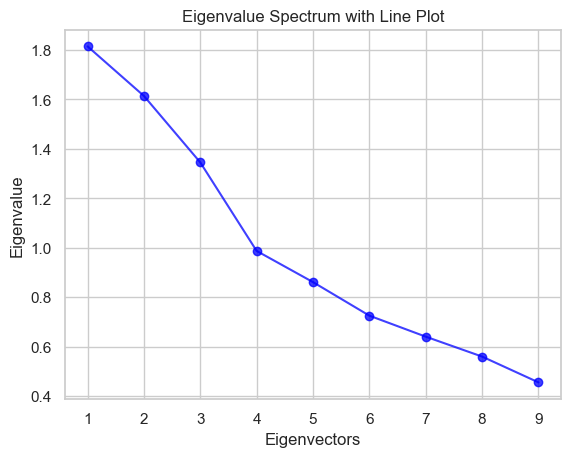

In [45]:
# Step 3: Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print(sorted_eigenvalues)
print(sorted_eigenvectors)

plt.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, marker = 'o', linestyle='-', color='blue', alpha=0.75)
plt.title('Eigenvalue Spectrum with Line Plot')
plt.xlabel('Eigenvectors')
plt.ylabel('Eigenvalue')
plt.show()


In [46]:
magnitude = np.linalg.norm(sorted_eigenvectors)
print(magnitude)

2.999999999999999


In [47]:
cumulative_variance_ratio = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)
print("Explained Variance\n",cumulative_variance_ratio)

# Print the variability along the k axis
for k in range(0,9):
    # Choose the desired k value (index starts from 0)
    variability_along_k = cumulative_variance_ratio[k]

Explained Variance
 [0.2016269  0.38097309 0.53041976 0.64006784 0.73568899 0.81622577
 0.887324   0.94946156 1.        ]


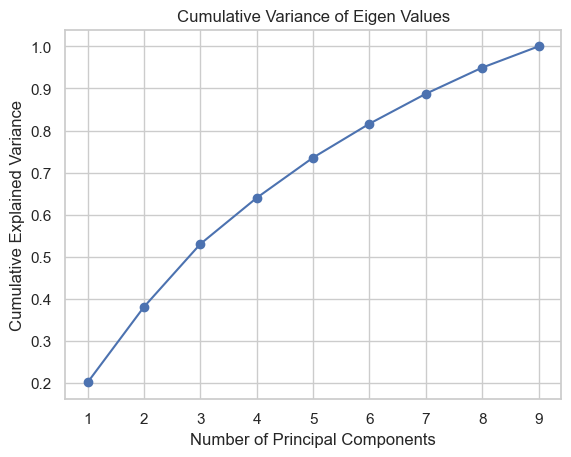

In [48]:
pca = PCA()
pca.fit(standardized_df)

# Scree plot to visualize explained variance
plt.plot(range(1, len(standardized_df.columns) + 1), np.cumsum(pca.explained_variance_ratio_), marker = 'o')
plt.title('Cumulative Variance of Eigen Values')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()









/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

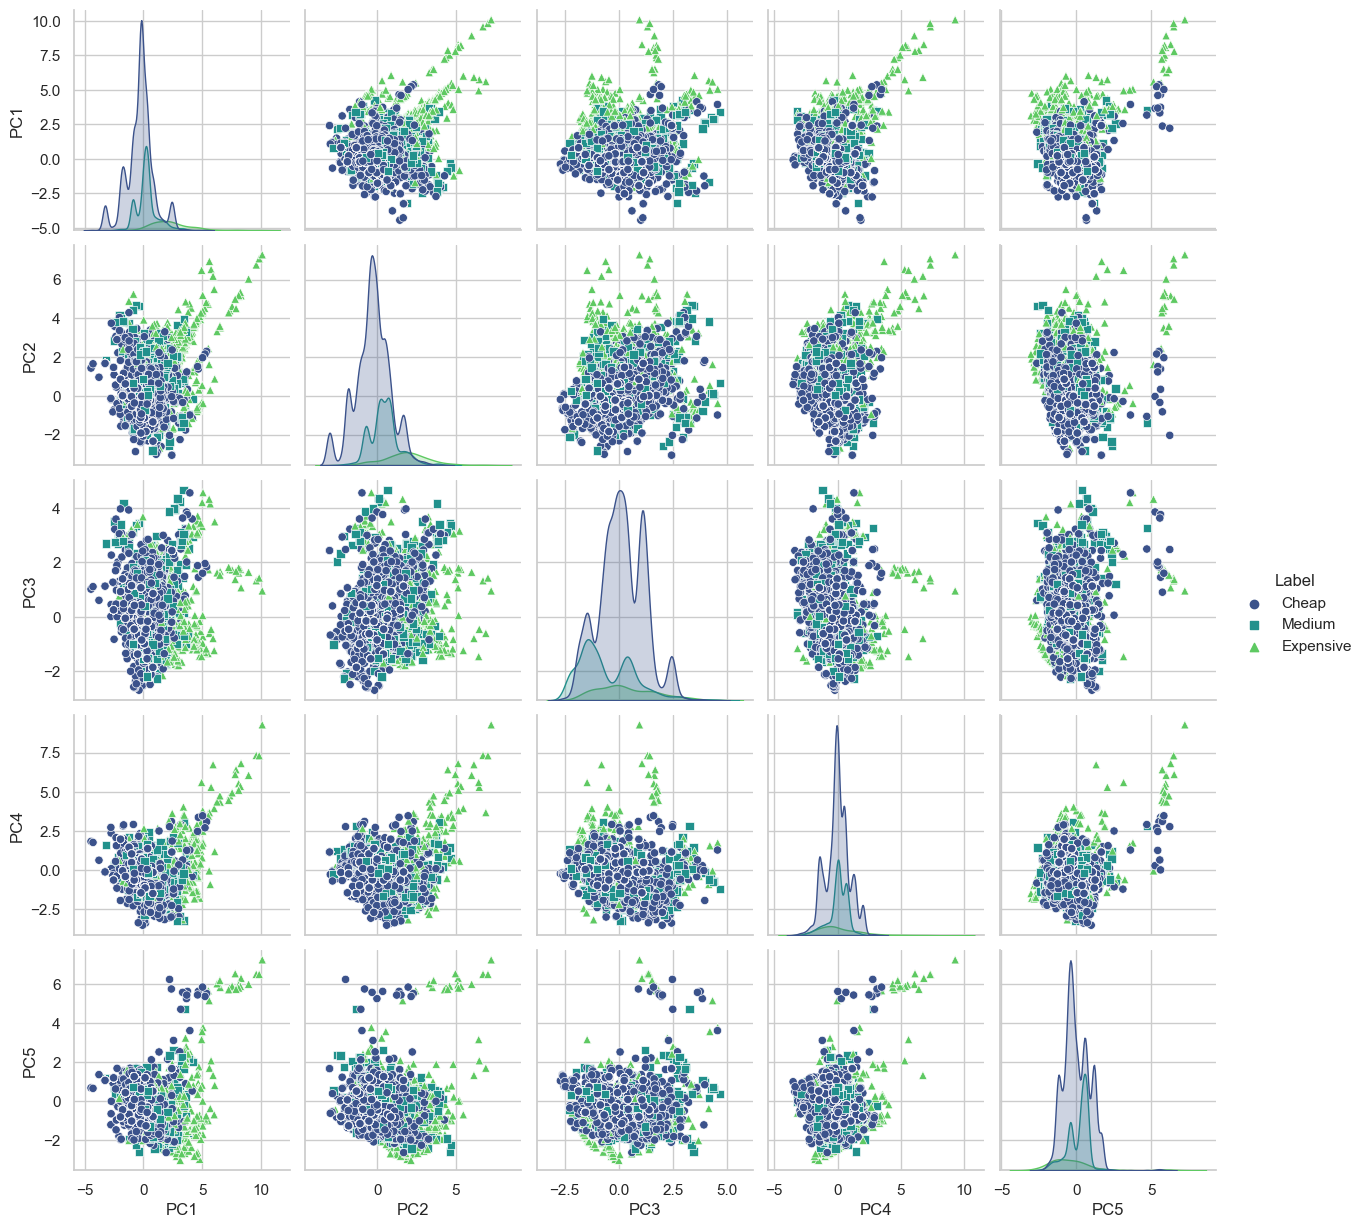

In [49]:

labels = dataset1['label']
sorted_labels_indices = np.argsort(labels)[::-1]
sorted_labels = labels[sorted_labels_indices]


unique_labels = np.unique(sorted_labels)

markers = [ 'o', 's', '^']

pca = PCA(n_components=5)
projected_data = pca.fit_transform(standardized_df)

pc_df = pd.DataFrame(data=projected_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

pc_df['Label'] = labels


sns.pairplot(pc_df, hue='Label',palette='viridis', markers = markers, diag_kws={'label': pc_df['Label']})
plt.show()











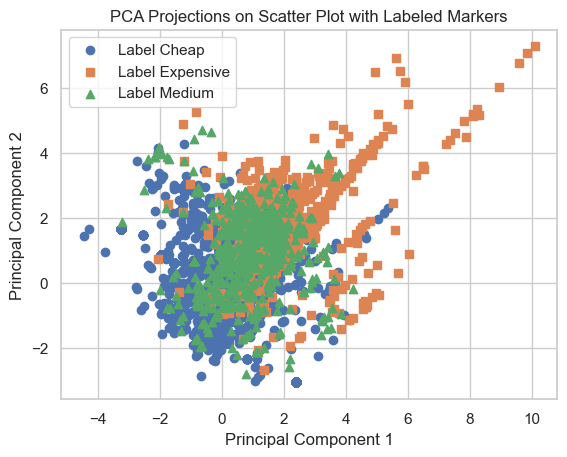

In [50]:
labels = dataset1['label']
sorted_labels_indices = np.argsort(labels)[::-1]
sorted_labels = labels[sorted_labels_indices]


unique_labels = np.unique(sorted_labels)

markers = [ 'o', 's', '^']
for i,label in enumerate(unique_labels):
    indices = np.where(label == dataset1['label'])
    plt.scatter(projected_data[indices,0], projected_data[indices,1], marker=markers[i], label=f'Label {label}')
    


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projections on Scatter Plot with Labeled Markers')
plt.legend()
plt.grid(True)
plt.show()



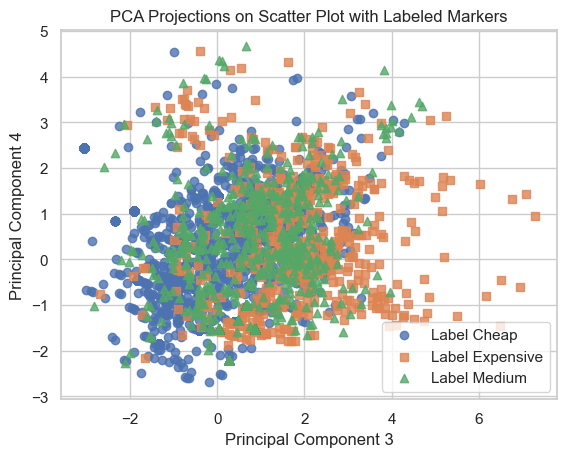

In [51]:
for i,label in enumerate(unique_labels):
    indices = np.where(label == dataset1['label'])
    plt.scatter(projected_data[indices, 1], projected_data[indices, 2], marker=markers[i], label=f'Label {label}', alpha=0.8)
    


plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.title('PCA Projections on Scatter Plot with Labeled Markers')
plt.legend()
plt.grid(True)
plt.show()


In [52]:
pc1_eigenvector = pca.components_[0, :]
pc2_eigenvector = pca.components_[1, :]
pc3_eigenvector = pca.components_[2, :]
pc4_eigenvector = pca.components_[3, :]
pc5_eigenvector = pca.components_[4, :]

In [53]:
eigenvectors_5d = pca.components_[:5, :]
features_associated_pc1 = pd.Series(eigenvectors_5d[0,:], index=standardized_df.columns)
features_associated_pc2 = pd.Series(eigenvectors_5d[1, :], index=standardized_df.columns)
features_associated_pc3 = pd.Series(eigenvectors_5d[2,:], index=standardized_df.columns)
features_associated_pc4 = pd.Series(eigenvectors_5d[3, :], index=standardized_df.columns)
features_associated_pc5 = pd.Series(eigenvectors_5d[4, :], index=standardized_df.columns)

In [54]:
print(features_associated_pc1)


winery        -0.057381
wine           0.176149
year          -0.332580
rating         0.438492
num_reviews   -0.312227
region         0.419010
type           0.322072
body           0.390790
acidity       -0.365092
dtype: float64


In [55]:
print(features_associated_pc2)

winery         0.273746
wine          -0.335813
year          -0.377749
rating         0.409967
num_reviews   -0.425260
region        -0.269159
type          -0.456916
body          -0.109992
acidity        0.165414
dtype: float64


In [56]:
print(features_associated_pc3)

winery        -0.589718
wine           0.275353
year           0.110370
rating         0.169104
num_reviews   -0.278487
region        -0.323491
type          -0.063861
body          -0.467464
acidity       -0.361710
dtype: float64


In [57]:
print(features_associated_pc4)

winery         0.229638
wine           0.421311
year          -0.537034
rating        -0.169887
num_reviews    0.368822
region         0.155372
type          -0.355680
body          -0.278726
acidity       -0.296864
dtype: float64


In [58]:
print(features_associated_pc5)

winery        -0.185614
wine          -0.703543
year          -0.213040
rating        -0.272882
num_reviews    0.146812
region        -0.082541
type           0.028217
body           0.071783
acidity       -0.562502
dtype: float64


<IPython.core.display.Javascript object>


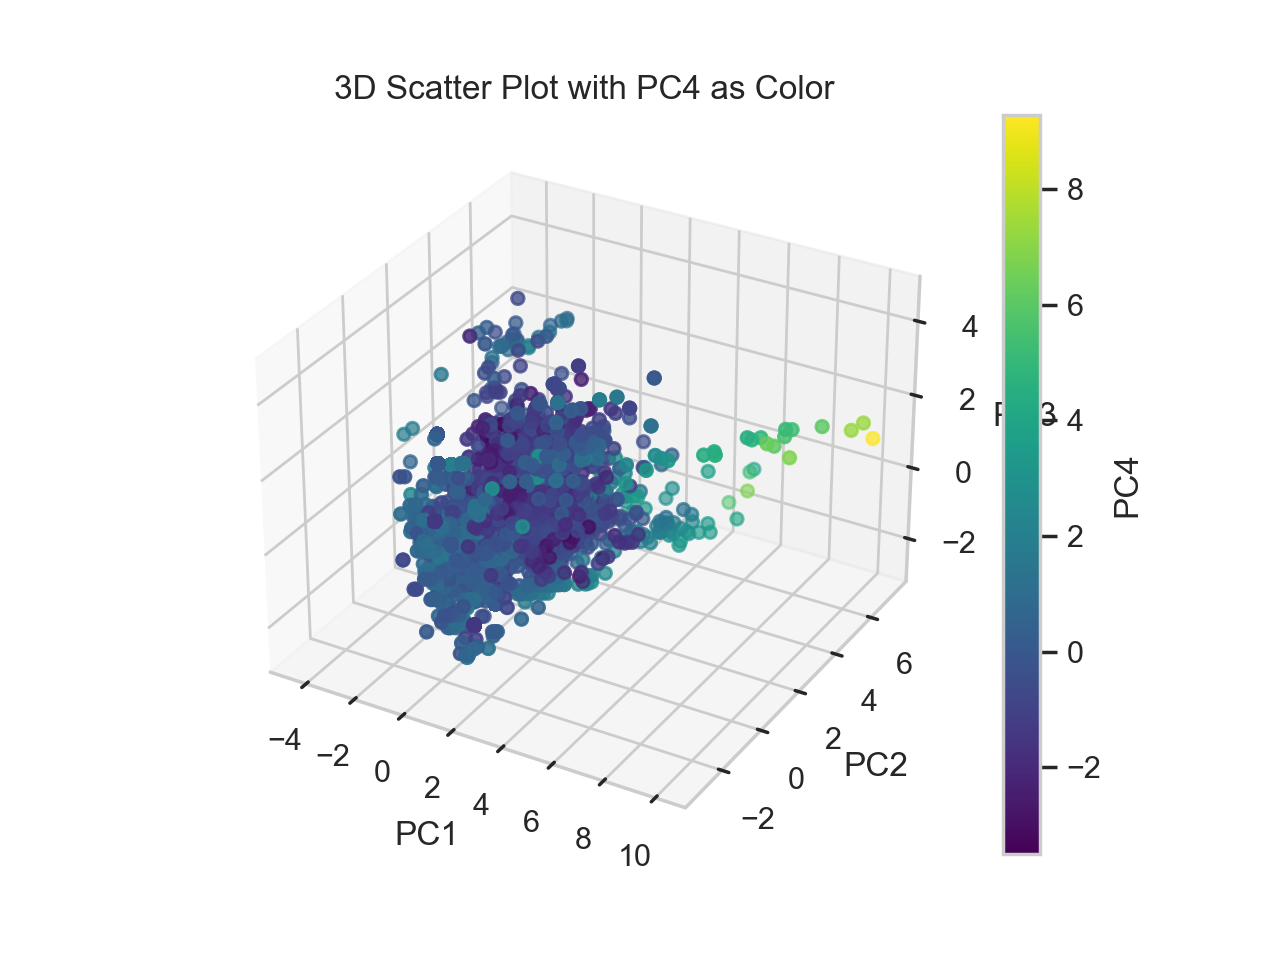

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook


# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pc_df['PC1'], pc_df['PC2'], pc_df['PC3'], c=pc_df['PC4'], cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot with PC4 as Color')

cbar = plt.colorbar(ax.scatter(pc_df['PC1'], pc_df['PC2'], pc_df['PC3'], c=pc_df['PC4'], cmap='viridis'))
cbar.set_label('PC4')


plt.show()



<IPython.core.display.Javascript object>


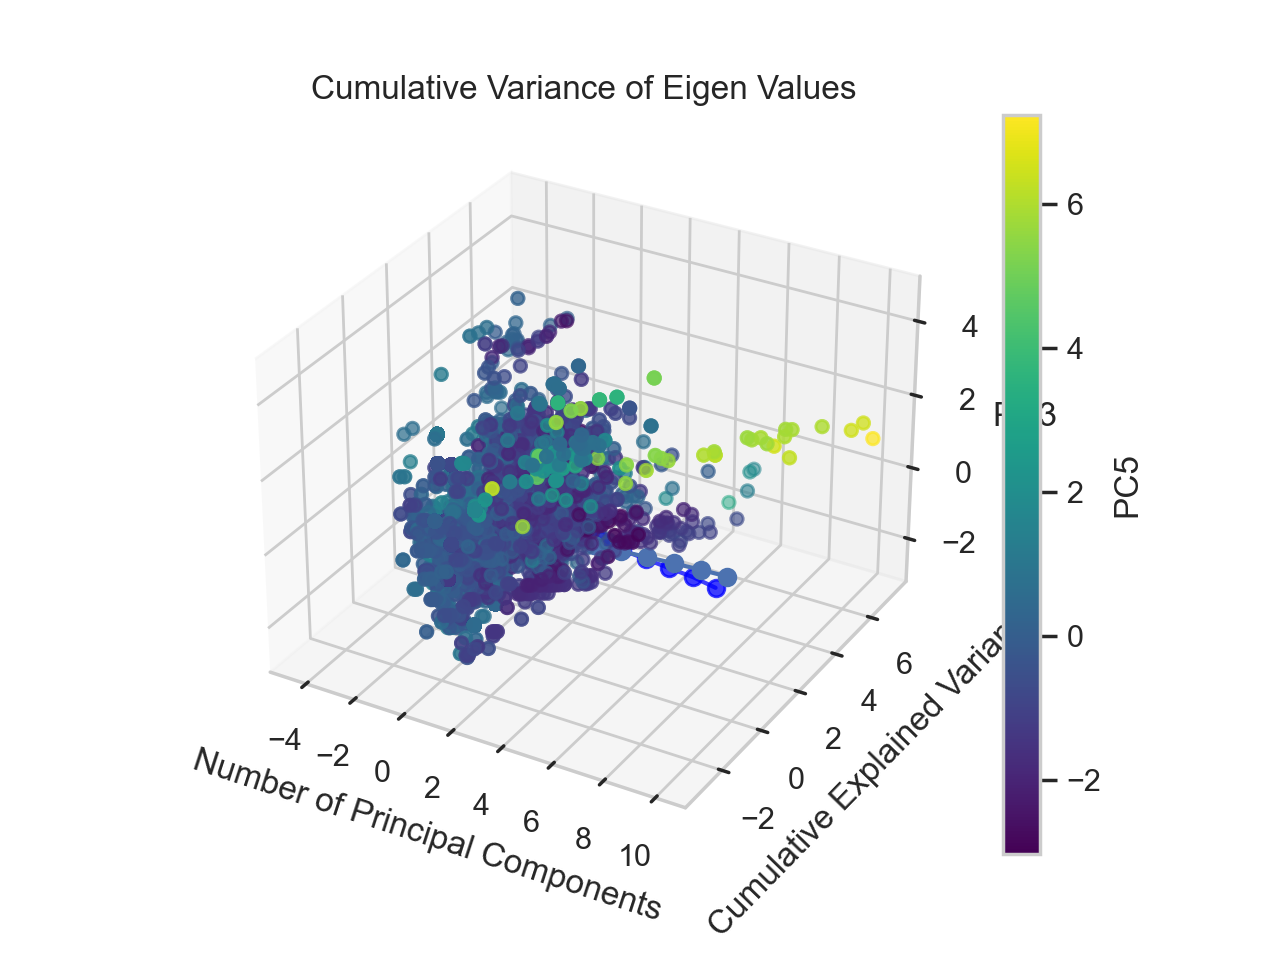

In [60]:
%matplotlib notebook


# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pc_df['PC1'], pc_df['PC2'], pc_df['PC3'], c=pc_df['PC5'], cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot with PC5 as Color')

cbar = plt.colorbar(ax.scatter(pc_df['PC1'], pc_df['PC2'], pc_df['PC3'], c=pc_df['PC5'], cmap='viridis'))
cbar.set_label('PC5')


Part 2: Prediction of Wine Quality

In [61]:

rating_dataset_X = df.drop(["rating"], axis=1)

rating_dataset_y = df["rating"]

print(rating_dataset_X)

      winery  wine    year  num_reviews  region   price  type  body  acidity
0        422   759  2013.0           58      69  150.00    19   5.0      3.0
1         33   790  2018.0           45      74  150.00    18   4.0      2.0
2        447   778  2009.0          693      57  150.00    11   5.0      3.0
3        447   778  1999.0          693      57  150.00    11   5.0      3.0
4        447   778  1996.0          693      57  150.00    11   5.0      3.0
...      ...   ...     ...          ...     ...     ...   ...   ...      ...
7495     159   619  2016.0          392      59   19.98    12   4.0      3.0
7496     158   440  2018.0          390      53   16.76     9   4.0      3.0
7497     334   302  2017.0          390      24   24.45    10   4.0      3.0
7498     316   342  2011.0          389      57   64.50    11   5.0      3.0
7499     406   596  2016.0          388      57   31.63    11   5.0      3.0

[7500 rows x 9 columns]


In [62]:
print(rating_dataset_X.dtypes)

winery           int64
wine             int64
year           float64
num_reviews      int64
region           int64
price          float64
type             int64
body           float64
acidity        float64
dtype: object


In [63]:
scaler = StandardScaler()
standardized_rating_d_x = pd.DataFrame(scaler.fit_transform(rating_dataset_X), columns=rating_dataset_X.columns)

print(standardized_rating_d_x)

        winery      wine      year  num_reviews    region     price      type  \
0     1.285011  1.282238 -0.058541    -2.146178  1.086370  3.141003  1.640803   
1    -1.772216  1.419208  0.674440    -2.236153  1.375263  3.141003  1.411003   
2     1.481491  1.366187 -0.644925     2.248776  0.393026  3.141003 -0.197597   
3     1.481491  1.366187 -2.110885     2.248776  0.393026  3.141003 -0.197597   
4     1.481491  1.366187 -2.550674     2.248776  0.393026  3.141003 -0.197597   
...        ...       ...       ...          ...       ...       ...       ...   
7495 -0.781958  0.663661  0.381247     0.165499  0.508583 -0.658453  0.032203   
7496 -0.789817 -0.127233  0.674440     0.151656  0.161911 -0.752548 -0.657198   
7497  0.593402 -0.736972  0.527844     0.151656 -1.513670 -0.527830 -0.427398   
7498  0.451936 -0.560236 -0.351733     0.144735  0.393026  0.642514 -0.197597   
7499  1.159264  0.562038  0.381247     0.137814  0.393026 -0.318016 -0.197597   

          body   acidity  


In [64]:
covariance_matrix_d_x = standardized_rating_d_x.cov()
print(covariance_matrix_d_x)

               winery      wine      year  num_reviews    region     price  \
winery       1.000133 -0.156249 -0.168033     0.019156  0.060096  0.062602   
wine        -0.156249  1.000133  0.031672     0.077322  0.153108 -0.047403   
year        -0.168033  0.031672  1.000133     0.157617 -0.111817 -0.529312   
num_reviews  0.019156  0.077322  0.157617     1.000133  0.016135 -0.323570   
region       0.060096  0.153108 -0.111817     0.016135  1.000133  0.202962   
price        0.062602 -0.047403 -0.529312    -0.323570  0.202962  1.000133   
type        -0.123894  0.156407  0.121592     0.011584  0.271471 -0.049272   
body         0.088714 -0.041725 -0.110857     0.016649  0.314553  0.248761   
acidity      0.222874 -0.151821  0.155470     0.092672 -0.153030 -0.149681   

                 type      body   acidity  
winery      -0.123894  0.088714  0.222874  
wine         0.156407 -0.041725 -0.151821  
year         0.121592 -0.110857  0.155470  
num_reviews  0.011584  0.016649  0.092672  

In [65]:
eigenvalues, eigenvectors= np.linalg.eigh(covariance_matrix_d_x)

In [66]:
len(eigenvalues)

9

In [67]:
print(eigenvalues)

[0.39788114 0.55822702 0.63683575 0.72564237 0.80710717 0.96475219
 1.2950182  1.64146157 1.97427474]


In [68]:
print(eigenvectors)

[[-0.16180408 -0.21320083  0.21273671 -0.5902817   0.27139116  0.25103281
  -0.51787144  0.35166618 -0.07838938]
 [-0.00950482 -0.2140902   0.25244525  0.23664114  0.51392111  0.59671611
   0.21105292 -0.41003757 -0.03857788]
 [-0.55251387 -0.3747548  -0.25377005 -0.01157167  0.1956377  -0.34608444
  -0.11471365 -0.31593072  0.46769022]
 [-0.25721925  0.17757068  0.05882611  0.1168333  -0.61059019  0.50926071
  -0.36485567 -0.22021803  0.26723377]
 [ 0.1185782   0.14912309 -0.75694501 -0.1086159   0.14625799  0.15330219
  -0.29087083 -0.31625611 -0.38655094]
 [-0.72684685  0.10941657  0.00345503  0.27408523 -0.00572112  0.0110051
   0.12388425  0.24494361 -0.55595729]
 [-0.09918204  0.51462284  0.44514176 -0.24841233  0.11954405 -0.33478708
  -0.15341015 -0.53632204 -0.16708442]
 [ 0.2131251  -0.52712963  0.22800342  0.38091368 -0.18281464 -0.25068224
  -0.46455634 -0.16742007 -0.37353234]
 [ 0.06833201  0.3997828  -0.00634958  0.5367127   0.42661616 -0.05696366
  -0.44909525  0.290182

In [69]:
# Step 3: Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print(sorted_eigenvalues)
print(sorted_eigenvectors)

plt.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, marker = 'o', linestyle='-', color='blue', alpha=0.75)
plt.title('Eigenvalue Spectrum with Line Plot')
plt.xlabel('Eigenvector')
plt.ylabel('Eigenvalue')
plt.show()

[1.97427474 1.64146157 1.2950182  0.96475219 0.80710717 0.72564237
 0.63683575 0.55822702 0.39788114]
[[-0.07838938  0.35166618 -0.51787144  0.25103281  0.27139116 -0.5902817
   0.21273671 -0.21320083 -0.16180408]
 [-0.03857788 -0.41003757  0.21105292  0.59671611  0.51392111  0.23664114
   0.25244525 -0.2140902  -0.00950482]
 [ 0.46769022 -0.31593072 -0.11471365 -0.34608444  0.1956377  -0.01157167
  -0.25377005 -0.3747548  -0.55251387]
 [ 0.26723377 -0.22021803 -0.36485567  0.50926071 -0.61059019  0.1168333
   0.05882611  0.17757068 -0.25721925]
 [-0.38655094 -0.31625611 -0.29087083  0.15330219  0.14625799 -0.1086159
  -0.75694501  0.14912309  0.1185782 ]
 [-0.55595729  0.24494361  0.12388425  0.0110051  -0.00572112  0.27408523
   0.00345503  0.10941657 -0.72684685]
 [-0.16708442 -0.53632204 -0.15341015 -0.33478708  0.11954405 -0.24841233
   0.44514176  0.51462284 -0.09918204]
 [-0.37353234 -0.16742007 -0.46455634 -0.25068224 -0.18281464  0.38091368
   0.22800342 -0.52712963  0.2131251

In [70]:
cumulative_variance_ratio = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

# Print the variability along the k axis
for k in range(0,9):
    # Choose the desired k value (index starts from 0)
    variability_along_k = cumulative_variance_ratio[k]
    
print("Explained variance\n",cumulative_variance_ratio)

Explained variance
 [0.21933461 0.40169491 0.54556664 0.65274703 0.74241365 0.82302983
 0.89377992 0.95579688 1.        ]


In [71]:
pca = PCA()
pca.fit(standardized_rating_d_x)

# Scree plot to visualize explained variance
plt.plot(range(1, len(standardized_rating_d_x.columns) + 1), np.cumsum(pca.explained_variance_ratio_), marker = 'o')
plt.title('Cumulative Variance of Eigen Values')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

<IPython.core.display.Javascript object>


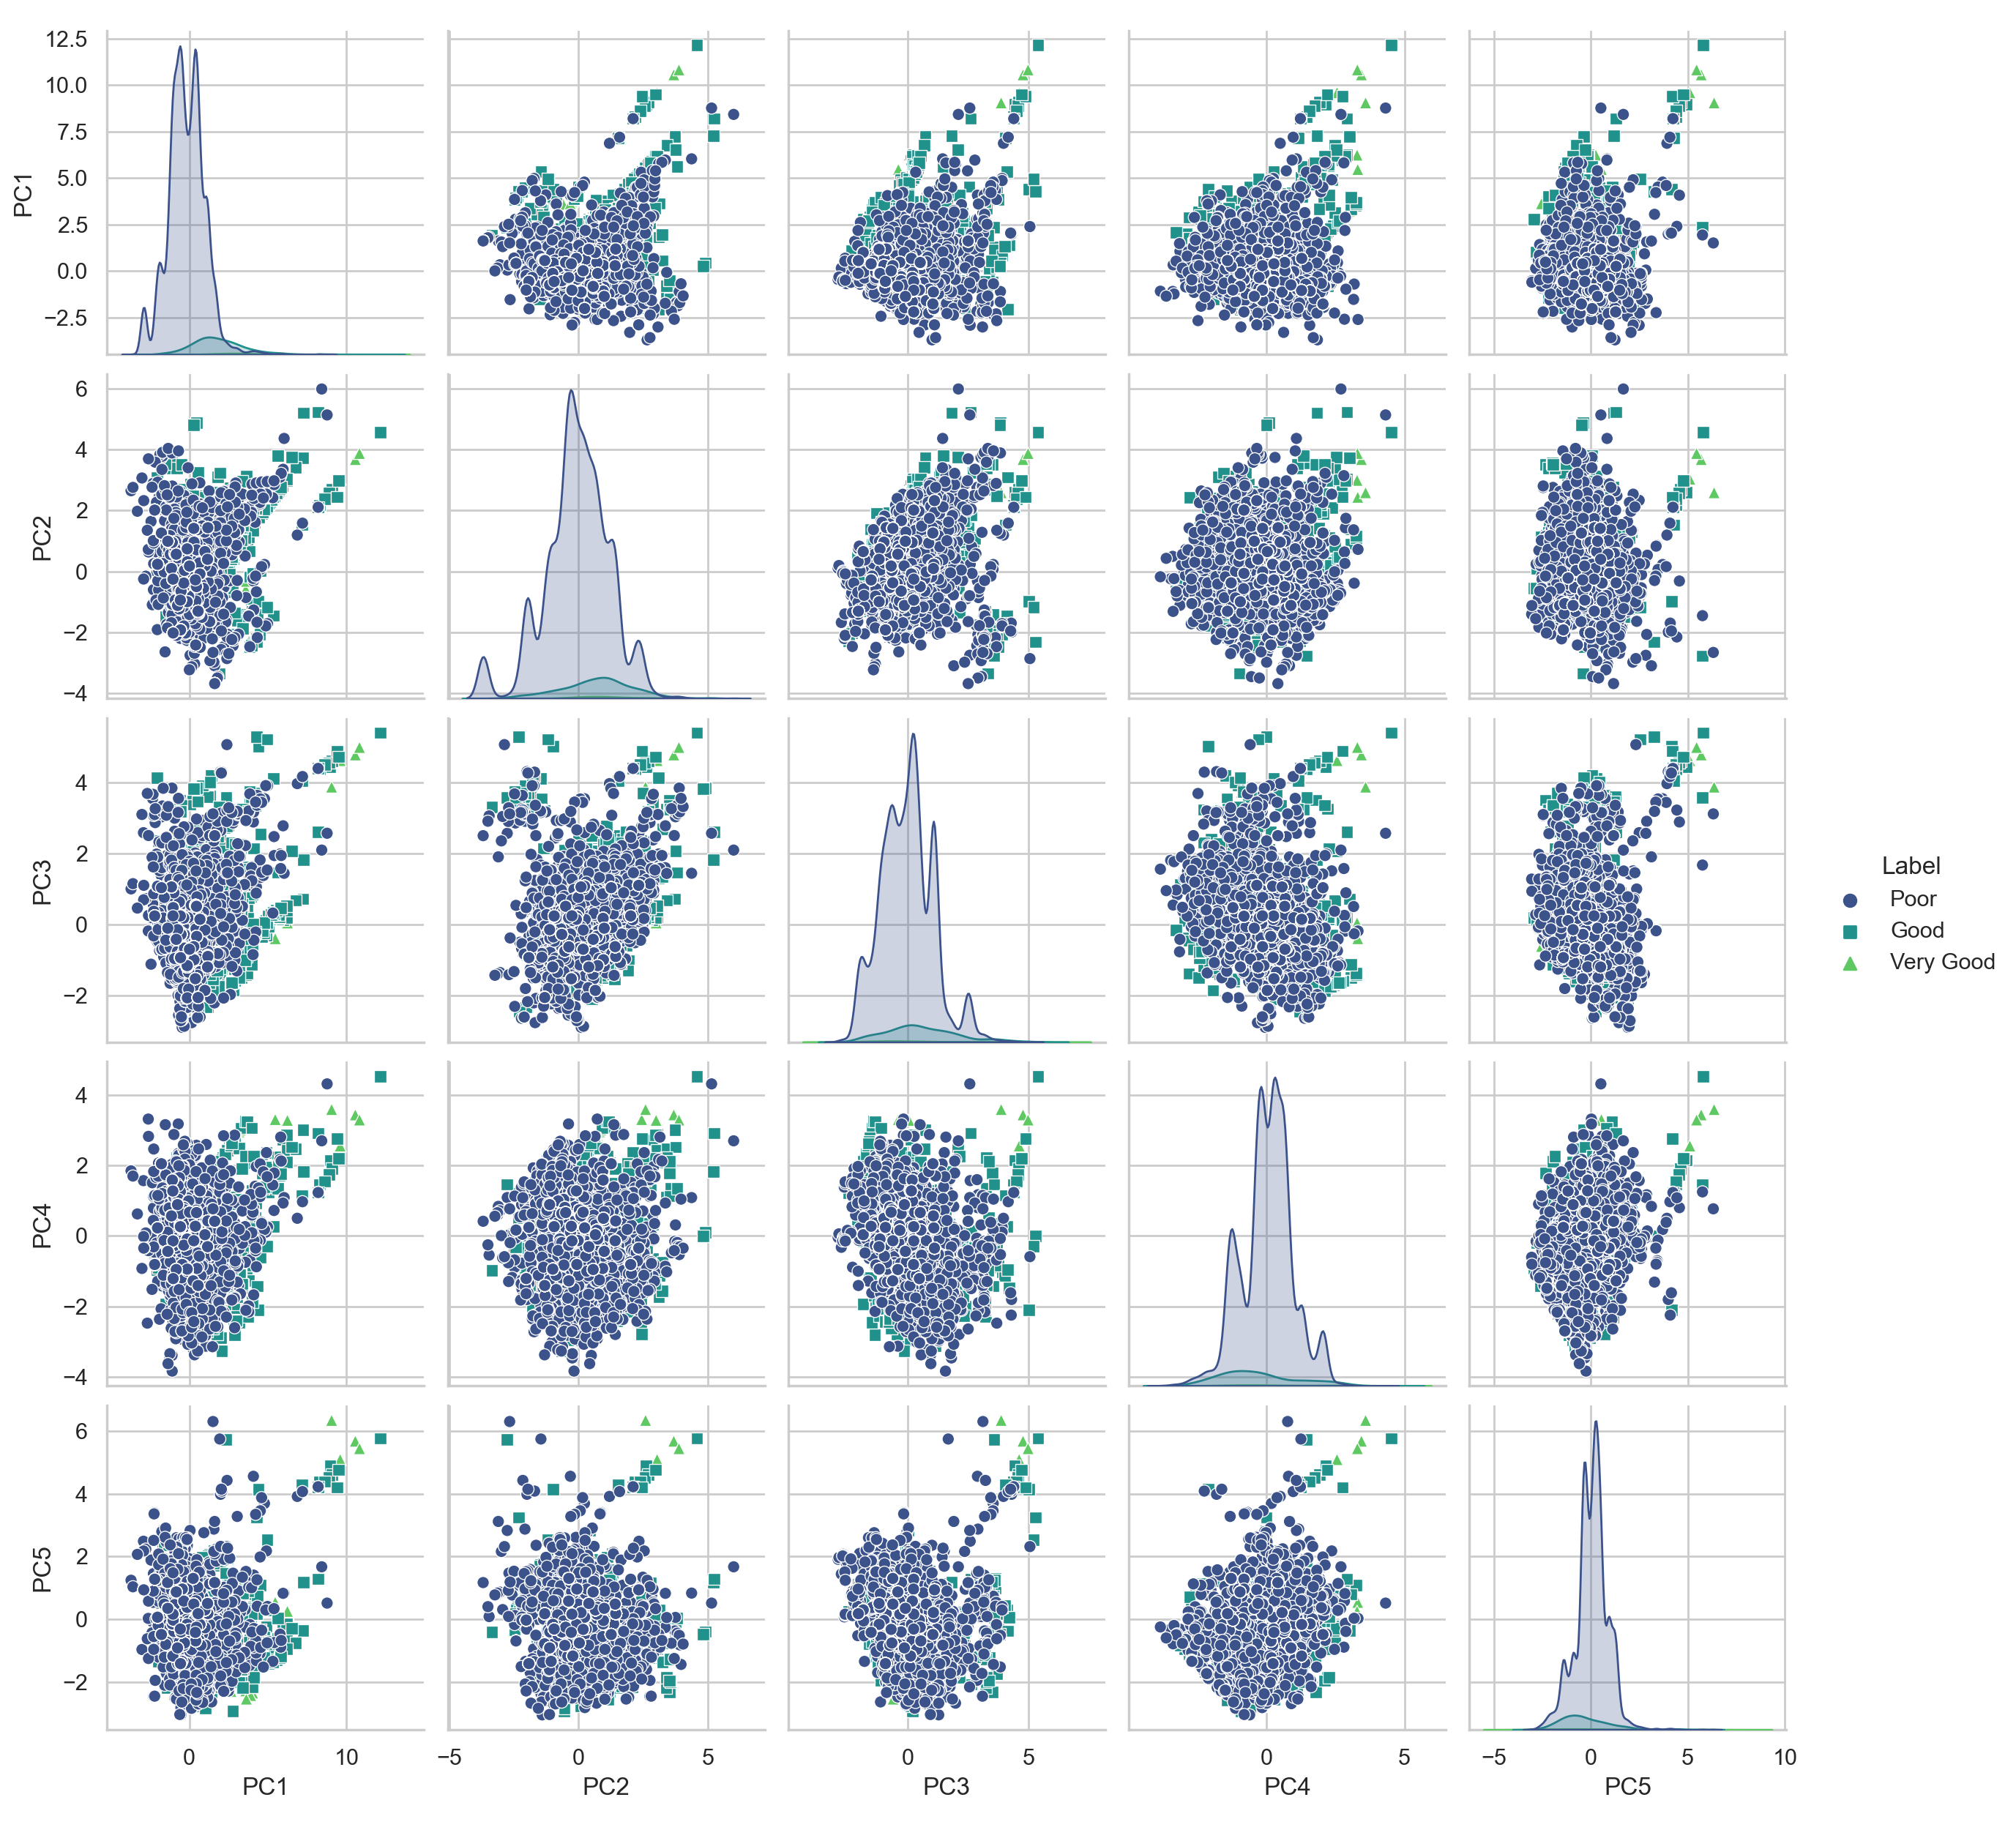

/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-pack

/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

In [72]:
labels_rating = ['Poor','Good','Very Good']
labels = dataset2['label']
sorted_labels_indices = np.argsort(labels)[::-1]
sorted_labels = labels[sorted_labels_indices]



pca = PCA(n_components=5)
projected_data = pca.fit_transform(standardized_rating_d_x)

pc_df = pd.DataFrame(data=projected_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pc_df['Label'] = labels

markers = [ 'o', 's', '^']


sns.pairplot(pc_df, hue='Label',palette='viridis', markers = markers, diag_kws={'label': pc_df['Label']})

plt.show()


In [74]:
pc1_eigenvector = pca.components_[0, :]
pc2_eigenvector = pca.components_[1, :]
pc3_eigenvector = pca.components_[2, :]
pc4_eigenvector = pca.components_[3, :]
pc5_eigenvector = pca.components_[4, :]

In [75]:
eigenvectors_5d = pca.components_[:5, :]
features_associated_pc1 = pd.Series(eigenvectors_5d[0,:], index=standardized_rating_d_x.columns)
features_associated_pc2 = pd.Series(eigenvectors_5d[1, :], index=standardized_rating_d_x.columns)
features_associated_pc3 = pd.Series(eigenvectors_5d[2,:], index=standardized_rating_d_x.columns)
features_associated_pc4 = pd.Series(eigenvectors_5d[3, :], index=standardized_rating_d_x.columns)
features_associated_pc5 = pd.Series(eigenvectors_5d[4, :], index=standardized_rating_d_x.columns)

In [76]:
print(features_associated_pc1)

winery         0.078389
wine           0.038578
year          -0.467690
num_reviews   -0.267234
region         0.386551
price          0.555957
type           0.167084
body           0.373532
acidity       -0.276161
dtype: float64


In [77]:
print(features_associated_pc2)

winery         0.351666
wine          -0.410038
year          -0.315931
num_reviews   -0.220218
region        -0.316256
price          0.244944
type          -0.536322
body          -0.167420
acidity        0.290182
dtype: float64


In [78]:
print(features_associated_pc3)

winery        -0.517871
wine           0.211053
year          -0.114714
num_reviews   -0.364856
region        -0.290871
price          0.123884
type          -0.153410
body          -0.464556
acidity       -0.449095
dtype: float64


In [79]:
print(features_associated_pc4)

winery         0.251033
wine           0.596716
year          -0.346084
num_reviews    0.509261
region         0.153302
price          0.011005
type          -0.334787
body          -0.250682
acidity       -0.056964
dtype: float64


In [80]:
print(features_associated_pc5)

winery        -0.271391
wine          -0.513921
year          -0.195638
num_reviews    0.610590
region        -0.146258
price          0.005721
type          -0.119544
body           0.182815
acidity       -0.426616
dtype: float64


<IPython.core.display.Javascript object>


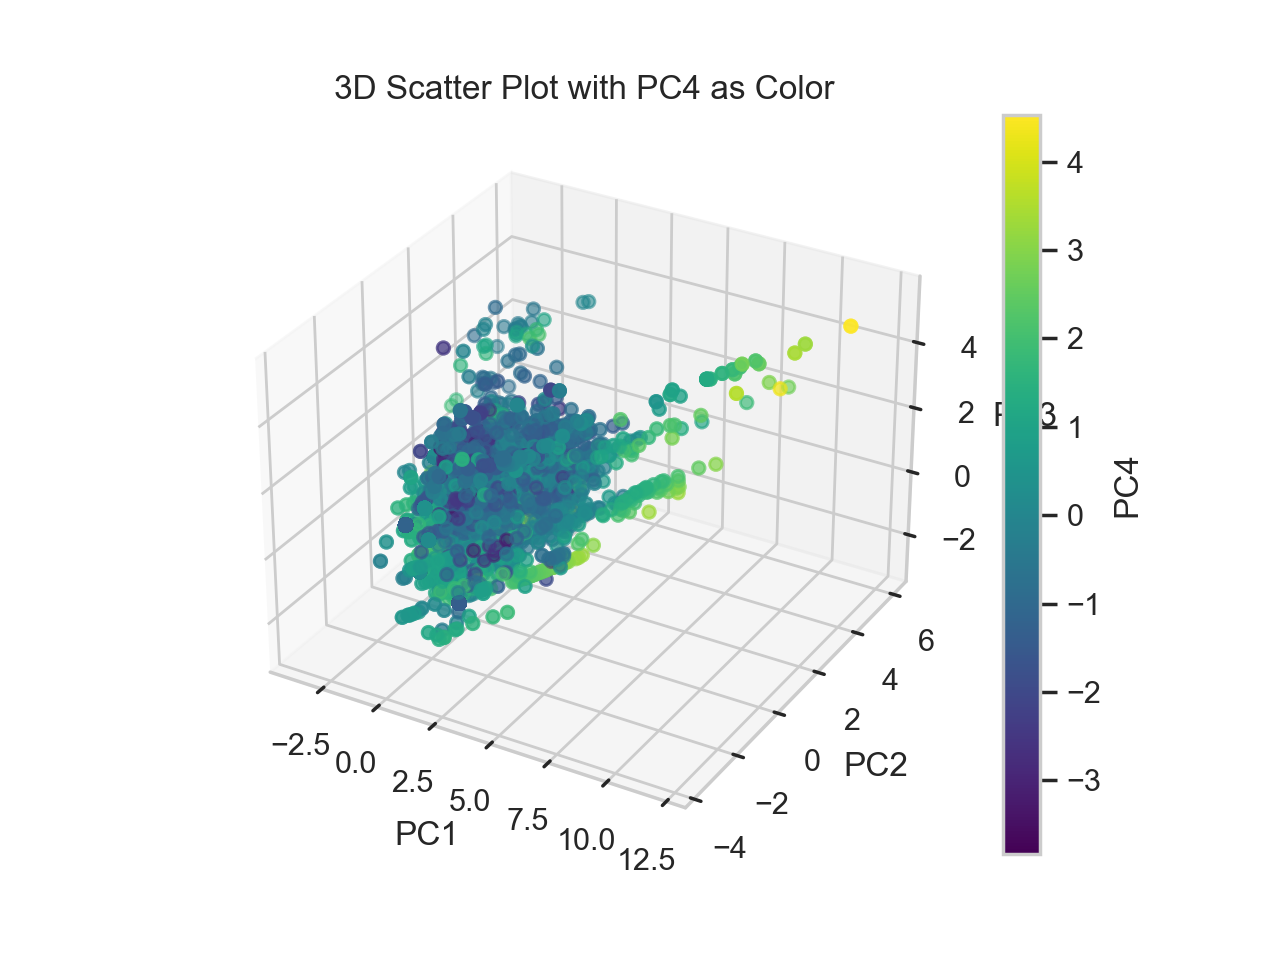

In [81]:
%matplotlib notebook


# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pc_df['PC1'], pc_df['PC2'], pc_df['PC3'], c=pc_df['PC4'], cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot with PC4 as Color')

cbar = plt.colorbar(ax.scatter(pc_df['PC1'], pc_df['PC2'], pc_df['PC3'], c=pc_df['PC4'], cmap='viridis'))
cbar.set_label('PC4')

<IPython.core.display.Javascript object>


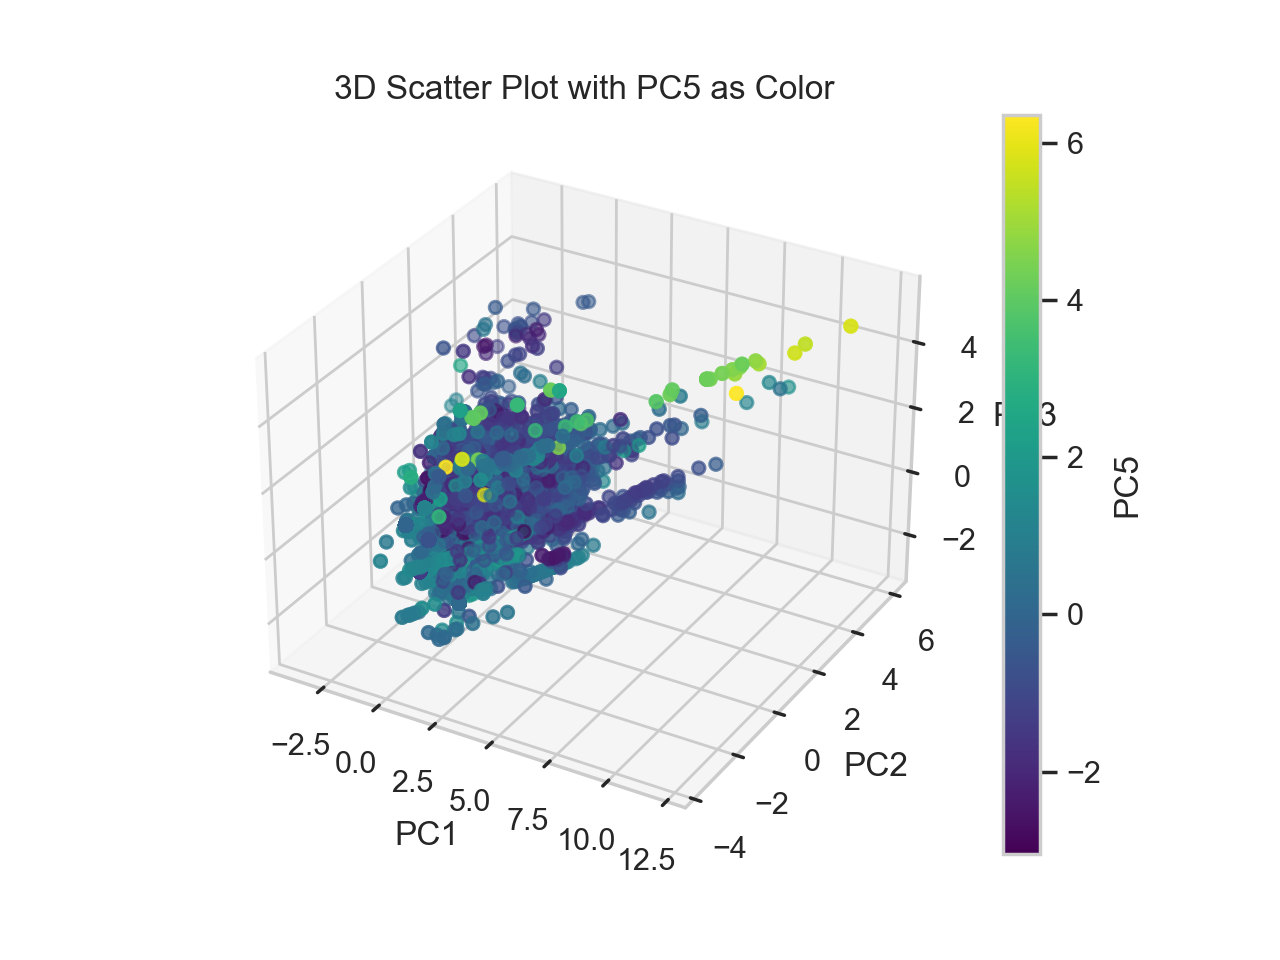

In [82]:
%matplotlib notebook


# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pc_df['PC1'], pc_df['PC2'], pc_df['PC3'], c=pc_df['PC5'], cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot with PC5 as Color')

cbar = plt.colorbar(ax.scatter(pc_df['PC1'], pc_df['PC2'], pc_df['PC3'], c=pc_df['PC5'], cmap='viridis'))
cbar.set_label('PC5')